# 2. Disease prediction

---

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
file_path = "../Data/cardio_train.csv"

df = pd.read_csv(file_path, sep= ";")

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [13]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 2.0 - EDA uppvärmning 

---

### **a)** 
### Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

---

In [14]:
negative, positive = df["cardio"].value_counts()
print(f"Negative: {negative}")
print(f"Positive: {positive}")

Negative: 35021
Positive: 34979


### **b)** 
### Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

---

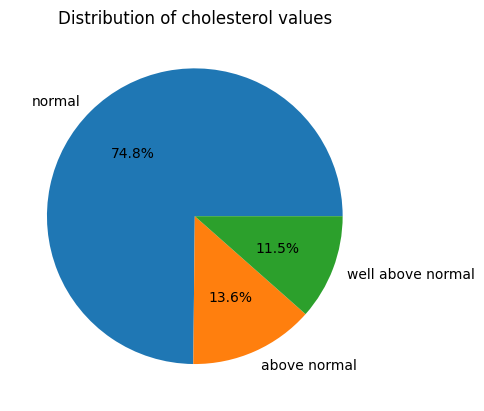

In [15]:
plt.pie(df["cholesterol"].value_counts(), labels= ["normal", "above normal", "well above normal"], autopct="%1.1f%%");
plt.title("Distribution of cholesterol values");

### **c)** 
### Hur ser åldersfördelningen ut? Rita ett histogram.

---

<Axes: xlabel='age', ylabel='Count'>

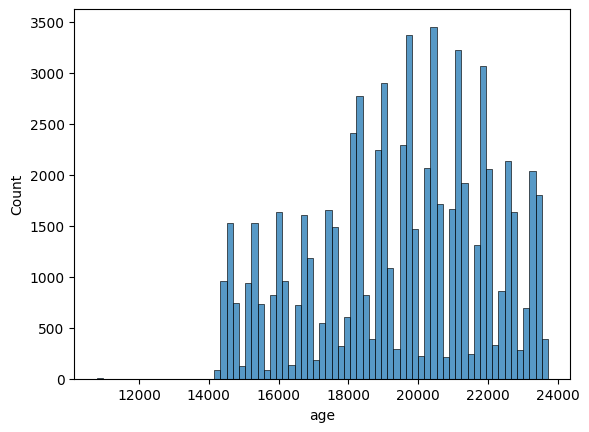

In [16]:
sns.histplot(data= df, x= "age")

### **d)** 
### Hur stor andel röker?

---

Text(0.5, 1.0, 'Distribution of smokers')

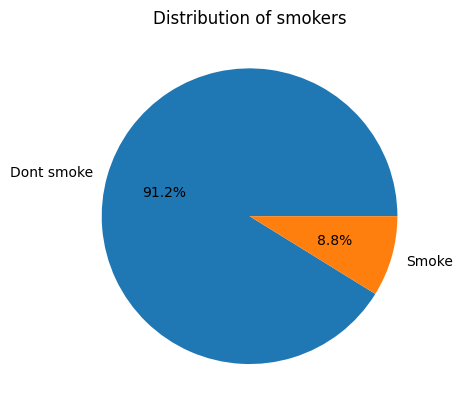

In [17]:
plt.pie(df["smoke"].value_counts(), labels= ["Dont smoke", "Smoke"], autopct="%1.1f%%");
plt.title("Distribution of smokers")

### **e)** 
### Hur ser viktfördelningen ut? Rita lämpligt diagram.

---

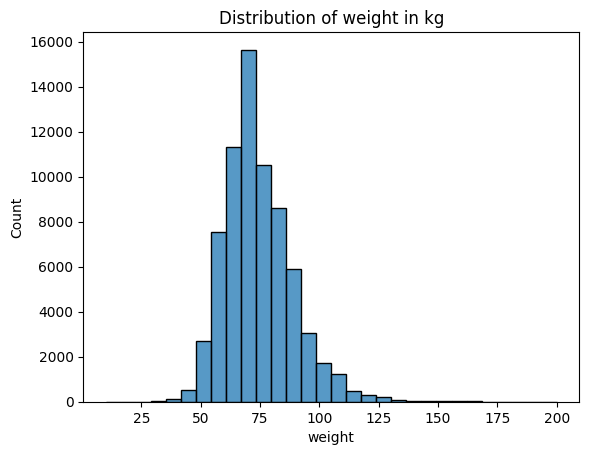

In [18]:
sns.histplot(data= df, x= "weight", bins= 30).set(title="Distribution of weight in kg");


### **f)** 
### Hur ser längdfördelningen ut? Rita lämpligt diagram.

---

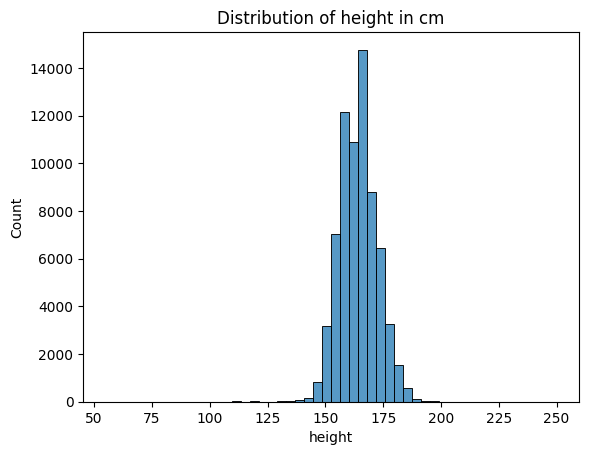

In [19]:
sns.histplot(data= df, x= "height", bins= 50).set(title="Distribution of height in cm");

### **g)** 
### Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

---

Text(0.5, 1.0, 'Distribution of Cardiovascular Disease Men')

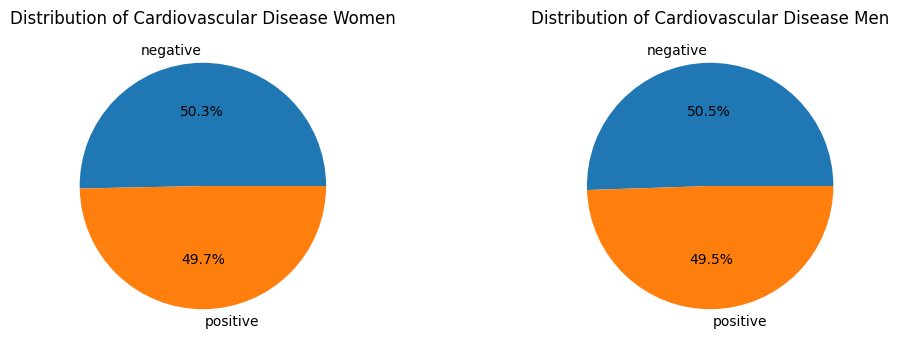

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 4))

# female
f_negative, f_positive = df["cardio"].loc[df["gender"] == 1].value_counts()
# male
m_negative, m_positive = df["cardio"].loc[df["gender"] == 2].value_counts()

ax1.pie(x=[f_negative, f_positive], labels= ["negative", "positive"], autopct="%1.1f%%");
ax1.set_title("Distribution of Cardiovascular Disease Women")

ax2.pie(x=[m_negative, m_positive], labels= ["negative", "positive"], autopct="%1.1f%%");
ax2.set_title("Distribution of Cardiovascular Disease Men")

    

## 2.1.0 - Feature engineering BMI

---

In [21]:
df["BMI"] = pd.Series([round((df["weight"][i]) / ((df["height"][i] / 100)**2), 1) for i in df.index])

### **a)**
### Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.

---

Lower: 14.4, Upper: 39.6


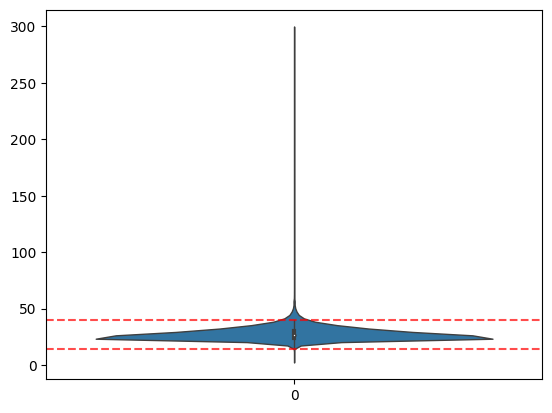

In [22]:
sns.violinplot(df["BMI"], linewidth= 1)

def tukey_fences(feature: pd.Series):

    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return lower, upper

lower, upper = tukey_fences(df["BMI"])

plt.axhline(lower, color= "r", alpha= 0.7, linestyle= "--")
plt.axhline(upper, color= "r", alpha= 0.7, linestyle= "--")

print(f"Lower: {lower:.1f}, Upper: {upper:.1f}")


<div style="width:100%">

<div style="width:30%; float:right; margin-right:10%; margin-left:5%;">
    

| BMI Category | BMI Range   |
|--------------|-------------|
| Severe underweight       | < 15.0      |
| Moderate underweight     | 15.0 - 15.9 |
| Mild underweight         | 16.0 - 18.4 |
| Underweight  | < 18.5      |
| Normal weight| 18.5 - 24.9 |
| Overweight   | 25 - 29.9   |
| Obesity class I | 30 - 34.9 |
| Obesity class II | 35 - 39.9 |
| Obesity class III | >= 40    |
    
</div>
    
<div style="width:55%; margin-left:10%;">
    
<h2>BMI outliers</h2>

<p>Jag valde att plota en violinplot för att lättare se outliers. Jag valde sen att använda mig av Tukey fences för att dra ungefärliga gränser för outliers.</p> 

<p>Lower: 14.4, Upper: 39.6 </p>

<p>jag jämförde dessa värden med en tabell över BMI Categorys och valde att använda Lower värdet då den ligger straks under tabellen men valde att lägga till 3 på Upper för att komma över tabellens top så att Obesity class III kommer med i datan. </p>

</div>
    
</div>



---

In [23]:
# drop some outliers from the dataset. 
df.drop(df[df["BMI"] < 14.4].index, inplace= True)
df.drop(df[df["BMI"] > 42.6].index, inplace= True)
df.reset_index(drop= True ,inplace= True)

### **b)** 
### Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).

---

In [24]:
# function for categorizing BMI values. 
def BMI_category(BMI: float):
    # returns a number depending on BMI value.
    if BMI < 25:
        return 0
    elif BMI >= 25 and BMI < 30:
        return 1
    elif BMI >= 30 and BMI < 35:
        return 2
    elif BMI >= 35 and BMI < 40:
        return 3
    else:
        return 4
    
# addes a new feature to the dataset using the BMI_category function.
df["BMI-category"] = pd.Series([int(BMI_category(float(df["BMI"][i]))) for i in df.index])

|BMI_category|int|
|------------|---|
|normal range| 0 |
|overweight  | 1 |
|obese (class I) | 2 |
|obese (class II) | 3 |
|obese (class III) | 4 |

## 2.1.1 - Feature engineering blodtryck

---

Systolic | Lower: 90.0, Upper: 170.0
Diastolic | Lower: 65.0, Upper: 105.0


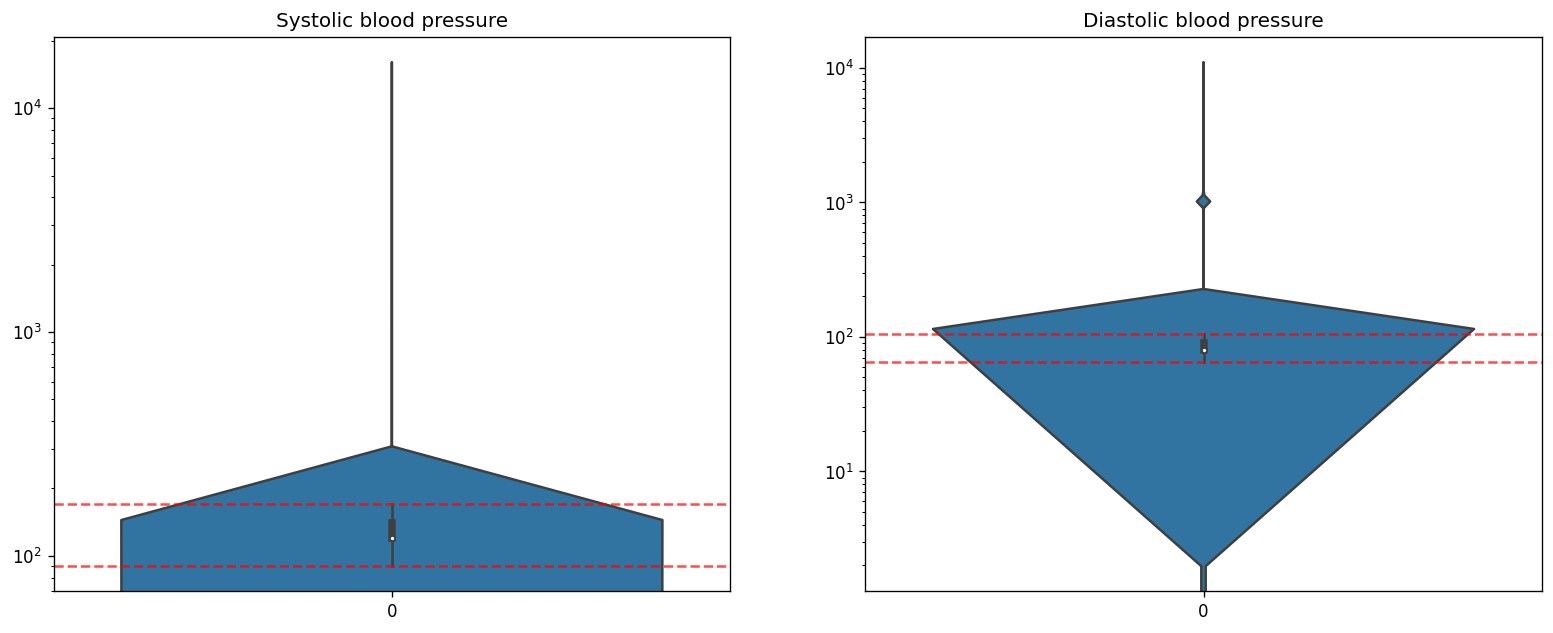

In [25]:
# subplots 
fig, axes = plt.subplots(1, 2, figsize= (16, 6), dpi= 120)

# dict with info about plots.
plot_info = {
    "Systolic": "ap_hi",
    "Diastolic": "ap_lo"
}

# loops through and plots the plots.
for key, ax in zip(plot_info.keys(), axes.flatten()):

    # draws the plot
    sns.violinplot(df[plot_info[key]], ax=ax)
    ax.set_title(f"{key} blood pressure") # sets plots title

    # using the tukey_fences function to get lower and upper.
    lower, upper = tukey_fences(df[plot_info[key]])

    # draw the upper and lower lines.
    ax.axhline(lower, color= "r", alpha= 0.7, linestyle= "--")
    ax.axhline(upper, color= "r", alpha= 0.7, linestyle= "--")
    
    # sets the yscale to log.
    ax.set(yscale="log")

    # prints lower and upper.
    print(f"{key} | Lower: {lower:.1f}, Upper: {upper:.1f}")

<div style="width:100%">

<div style="width:35%; float:right; margin-right:10%; margin-left:5%;">
    

| Blood pressure Category | Systolic   | Diastolic |
|--------------|-------------|-------------|
| Healthy | < 120 | < 80 |
| Elevated | 120 - 129 | < 80 |
| Stage I hypertension | 130 - 139 | 80 - 89 | 
| Stage II hypertension | 139 - 180 | 90 - 119 |
| Hypertension crisis | > 180 | > 119 | 

</div>
    
<div style="width:45%; margin-left:10%;">
    
<h2>Blood pressure outliers</h2>

<p>Som tidigare med BMI outliers har jag valde att plota en violinplot för att lättare se outliers. Jag valde också att använda mig av Tukey fences för hitta ungefärliga gränser för outliers bland de olika bold trycken.</p> 

<p>
Systolic | Lower: 90.0, Upper: 170.0 <br>
Diastolic | Lower: 65.0, Upper: 105.0
</p>

<p>Jag jämförde dessa värden med tabellen för Blood pressure Category <br>
och valde att använda Lower värdet från både Systolic och Diastolic då jag tycker båda värdena ligger rimligt till med tabellen.</p> 

<p>Men som i BMI outliers har jag valt att använda ett lite högre värde på upper <br>
så att alla kategorier kommer med från tabellen med en liten marginal, <br> 
Systolic: 190 och Diastolic: 130.</p>

</div>
    
</div>

---

In [26]:
# drop some outliers from the dataset. 
df.drop(df[df["ap_hi"] < 90].index, inplace= True)
df.drop(df[df["ap_hi"] > 190].index, inplace= True)
df.drop(df[df["ap_lo"] < 65].index, inplace= True)
df.drop(df[df["ap_lo"] > 130].index, inplace= True)
df.reset_index(drop= True ,inplace= True)

In [27]:
# function for categorizing Blood pressure values for ap_hi, and ap_lo. 
def blood_pressure_category(ap_hi: float, ap_lo: float):
    # returns a number depending on Blood pressure value.
    if (ap_hi < 120) and (ap_lo < 80):
        return 0
    if (ap_hi >= 120 and ap_hi < 130) and (ap_lo < 80):
        return 1
    if (ap_hi >= 130 and ap_hi < 140) or (ap_lo >= 80 and ap_lo < 90):
        return 2
    if (ap_hi >= 140 and ap_hi < 181) or (ap_lo >= 90 and ap_lo < 121):
        return 3
    if (ap_hi > 180) or (ap_lo > 120):
        return 4
    
               
# addes a new feature to the dataset using the blood_pressure_category function.
df["bp_category"] = pd.Series([int(blood_pressure_category(float(df["ap_hi"][i]), float(df["ap_lo"][i]))) for i in df.index])


| Blood pressure category| int |
|--------------------|--------|
| Healthy | 0 |
| Elevated | 1 |
| Stage I hypertension | 2 |
| Stage II hypertension | 3 |
| Hypertension crisis| 4 |

## 2.2.0 - Visualiseringar andel sjukdomar

---

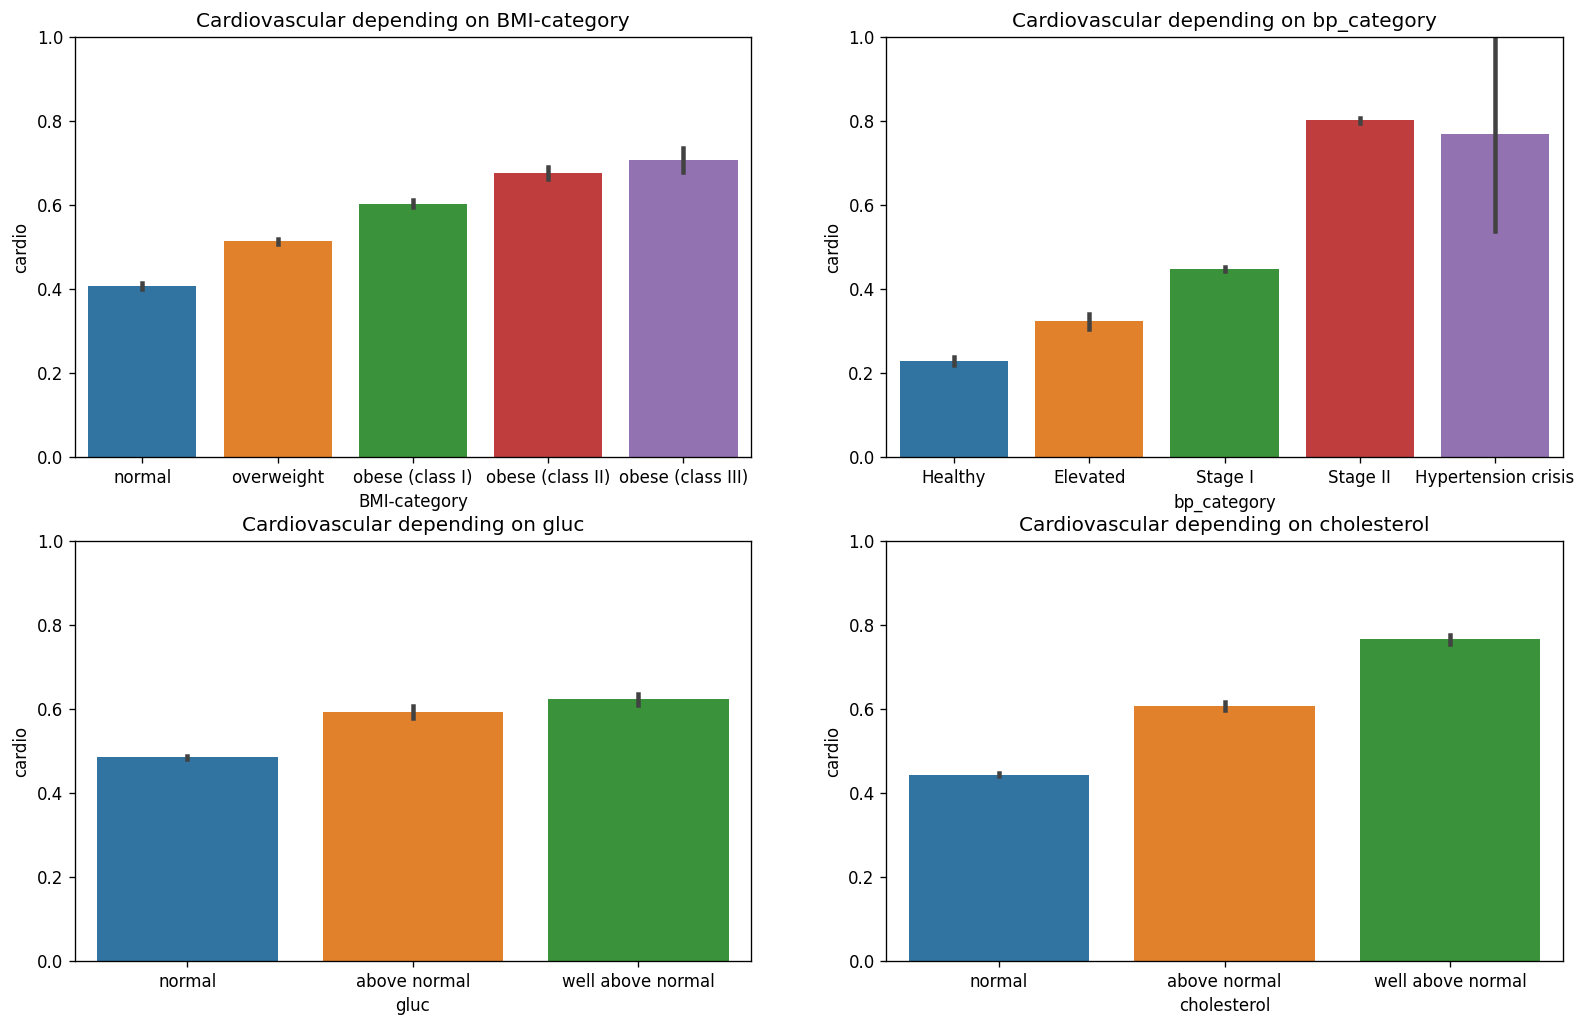

In [28]:
# adds subplots.
fig, axes = plt.subplots(2, 2, figsize= (16, 10), dpi= 120)

# dict for plot info with labels.
plot_info = {
    "BMI-category": ["normal", "overweight", "obese (class I)", "obese (class II)", "obese (class III)"],
    "bp_category": ["Healthy", "Elevated", "Stage I", "Stage II", "Hypertension crisis"],
    "gluc": ["normal", "above normal", "well above normal"],
    "cholesterol": ["normal", "above normal", "well above normal"]
}

# loops and plots the plots.
for i, ax in zip(plot_info.keys(), axes.flatten()):

    # draw the barplot.
    sns.barplot(df, x=i, y="cardio", ax= ax)
    ax.set_xticklabels(plot_info[i]) # sets ticker labels for plot_info.
    ax.set_title(f"Cardiovascular depending on {i}") # adds a title.
    ax.set_ylim(0, 1) # sets ylim to 1
    

## 2.2.1 - Visualiseringar korrelation

---

<Axes: >

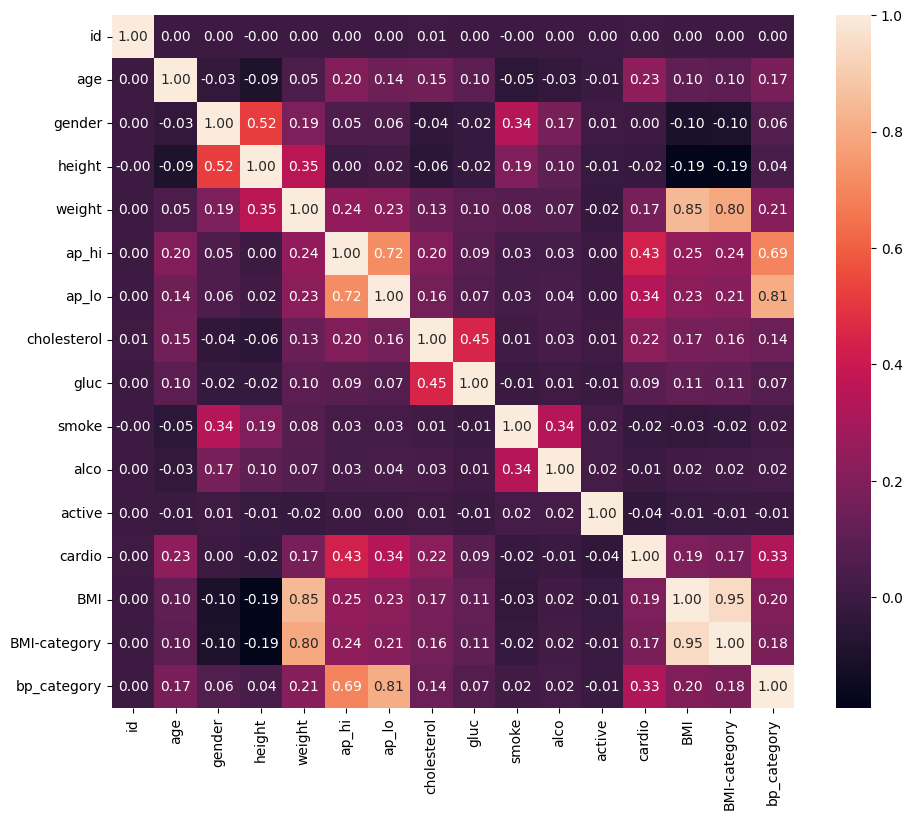

In [29]:
# fixes the size of fig.
plt.figure(figsize=(11, 9), dpi=100)
# draws the heatmap of correlations.
sns.heatmap(df.corr(), annot= True, fmt="0.2f")

<div style="width:100%; margin-right:10%; margin-left:10%;">

<h2>Korrelation</h2>

<p> 
Som man kan se från heatmapen så finns det några features som korrelerar med andra samt några som inte göre det. <br>
Många av korrelationerna verkar vara ganska förventade. 

Man kan till exempel se hur det finns en korrelation på 0.72 mellan ap_hi och ap_lo, vilket kanske är ganska förväntat <br> 
då båda har med bold tryck att göra och har nog en påverkan på varandra. 

Vi kan också se hur weight och height har en stark korrelation med BMI, vilket också är förväntat då BMI är beräknas <br> 
av höjd och vikt.
vi kan även se hur weight och height har en liten egen korrelation. 

gender och height verkar också ha en ganska hög korrelation på 0.52, vilket troligen beror på att <br> 
män i genom snitt är längre en kvinnor, deta kan man även se i datasetet om man jämnför kvinnor och mäns längder. 
</p>

</div>

---

## 2.3 - Skapa två datase

---

In [30]:
# creates two new dataframes and drops some columns.
dummies_categorys = df.drop(["ap_hi", "ap_lo", "height", "weight", "BMI"], axis= 1)
dummies_features = df.drop(["BMI-category", "bp_category", "weight", "height"], axis= 1)

# creates dummies of df_categorys and df_features.
dummies_categorys = pd.get_dummies(dummies_categorys, columns=["BMI-category", "bp_category", "gender"], prefix= ["BMI_dum", "bp_dum", "gender_dum"])
dummies_features = pd.get_dummies(dummies_features, columns=["gender"], prefix=["gender_dum"])

## 2.4 - Välja modell

---

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X, y = dummies_categorys.drop(columns="cardio", axis= 1), dummies_categorys["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
)

0
2
[('scaling', StandardScaler()), ('model', DecisionTreeClassifier(criterion='entropy', max_depth=7))]
DTC:               precision    recall  f1-score   support

           0       0.67      0.76      0.72      6462
           1       0.73      0.63      0.68      6476

    accuracy                           0.70     12938
   macro avg       0.70      0.70      0.70     12938
weighted avg       0.70      0.70      0.70     12938

1
2
[('scaling', StandardScaler()), ('model', LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                   solver='saga'))]
LOG:               precision    recall  f1-score   support

           0       0.68      0.76      0.72      6462
           1       0.73      0.64      0.68      6476

    accuracy                           0.70     12938
   macro avg       0.70      0.70      0.70     12938
weighted avg       0.70      0.70      0.70     12938



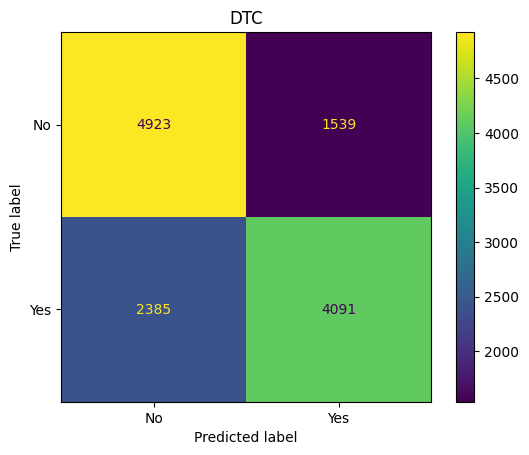

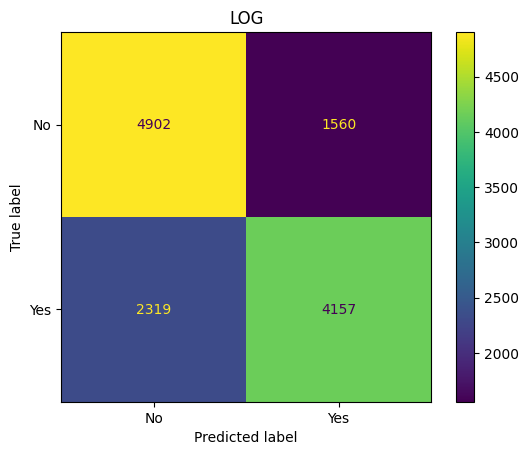

In [72]:
def evaluate_models(models: list, param_grids: list, titles: list, cv: int, scoring: str):

     for i in range(len(models)):
          
          classifier = (GridSearchCV(estimator= models[i], param_grid= param_grids[i], cv= cv, scoring= scoring))
          print(i)
          classifier.fit(X_train, y_train)
          print(2)
          classifier.best_estimator_.get_params()
          y_pred = classifier.predict(X_val)

          print(classifier.best_estimator_.get_params()["steps"][1])
          print(f"{titles[i]}: {classification_report(y_val, y_pred)}");
          cm = confusion_matrix(y_val, y_pred)
          ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
          plt.title(titles[i])



pipe_DTC = Pipeline([("scaling", StandardScaler()), ("model", DecisionTreeClassifier())])
param_DTC = {"model__criterion": ['gini', 'entropy'], "model__max_depth": list(range(1, 10))}

pipe_logistic = Pipeline([("scaling", StandardScaler()), ("model", LogisticRegression(penalty="elasticnet", solver="saga", multi_class="auto", max_iter=10000))])
param_logistic = {"model__l1_ratio": np.linspace(0, 1, 10)}

pipe_list = [pipe_DTC, pipe_logistic]
param_list = [param_DTC, param_logistic]
titles = ["DTC", "LOG"]

evaluate_models(pipe_list, param_list, titles, cv= 5, scoring= "accuracy")


In [73]:
pipe_logistic.get_params()["steps"][1]

('model',
 LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga'))